In [1]:
import numpy as np
import pandas as pd
import math
from tqdm.notebook import tqdm

In [71]:
%%time

# Hiperparámetros
codigo_hs = ['2710'] # Lista blanca de productos de importación
#lista_paises_aux = ['PRI'] # Lista blanca de paises


lista_paises_aux = ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'CAN', 'KOR',
                    'BRA', 'RUS', 'AUS', 'ESP', 'MEX', 'IDN', 'IRN', 'NLD', 'SAU', 'CHE',
                    'SDN', 'TUR', 'POL', 'SWE', 'BEL', 'THA', 'NGA', 'IRL', 'AUT', 'ISR',
                    'ARG', 'NOR', 'EGY', 'ZAF', 'ARE', 'VNM', 'MYS', 'DNK', 'PHL', 'SGP',
                    'BGD', 'HKG', 'CHL', 'COL', 'ROU', 'FIN', 'CZE', 'PAK', 'PRT', 'NZL',
                    'PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                    'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                    'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                    'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                    'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']


datos = {pais:[] for pais in lista_paises_aux}

# Cargado y filtrado de datos
for x in range(1995, 2021):
    # Cargado de la base de datos
    file_path = fr"C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/Datos del TFM/country_partner_hsproduct6digit_year_{x}.dta"
    data = pd.read_stata(file_path).values
    
    # Filtrado del producto de comercio utilizando el codigo_hs
    # Quitar las columnas con otros códigos y luego juntar los códigos para que solo queden de 4 cifras.
    data_filtrado = [fila for fila in data if any(valor in fila[10][0:-2] for valor in codigo_hs)]
    for fila, valores in enumerate(data_filtrado):
        data_filtrado[fila][10] = f"{valores[10][:-2]}XX"
    
    
    data_filtrado = np.array(data_filtrado)
    unique = np.unique(data_filtrado[:,8])
    lista_paises_aux = [pais for pais in lista_paises_aux if pais in unique]

    for pais in lista_paises_aux:
        lista_paises = [pais]
        
        # Filtrado de paises
        data_filtrado_aux = [fila for fila in data_filtrado if any(valor in fila[8] for valor in lista_paises)]
        data_filtrado_aux = np.array(data_filtrado_aux)
        
        aux = datos[pais]
        aux.append(data_filtrado_aux)
        datos[pais] = aux
        
datos = {key:np.array(value) for key, value in datos.items() if len(value)!=0}

Wall time: 10min 59s


In [87]:
# Cuidado, no se copian las cosas, hay problemas de puntero
aux = datos['USA'][0]
print(datos['USA'][0][0])
aux[0] = np.array([231, 15, 5849, 1995, 6624.0, 81661.0, 1.771648, 1.184, 'USA', 'AUT', '271000'])
print(datos['USA'][0][0])
print(aux[0])

['231' '15' '5849' '1995' '6624.0' '81661.0' '1.771648' '1.184' 'USA'
 'AUT' '271000']
['231' '15' '5849' '1995' '6624.0' '81661.0' '1.771648' '1.184' 'USA'
 'AUT' '271000']
['231' '15' '5849' '1995' '6624.0' '81661.0' '1.771648' '1.184' 'USA'
 'AUT' '271000']


In [40]:
lista_paises = ['PRI']
codigo_hs = ['2710']

data_filtrado = [fila for fila in data if any(valor in fila[10][0:-2] for valor in codigo_hs)]
#data_filtrado = [fila for fila in data_filtrado if any(valor in fila[8] for valor in lista_paises)]
data_filtrado = np.array(data_filtrado)
unique = np.unique(data_filtrado[:,8])

In [43]:
lista_paises_aux = ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'CAN', 'KOR',
                    'BRA', 'RUS', 'AUS', 'ESP', 'MEX', 'IDN', 'IRN', 'NLD', 'SAU', 'CHE',
                    'SDN', 'TUR', 'POL', 'SWE', 'BEL', 'THA', 'NGA', 'IRL', 'AUT', 'ISR',
                    'ARG', 'NOR', 'EGY', 'ZAF', 'ARE', 'VNM', 'MYS', 'DNK', 'PHL', 'SGP',
                    'BGD', 'HKG', 'CHL', 'COL', 'ROU', 'FIN', 'CZE', 'PAK', 'PRT', 'NZL',
                    'PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                    'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                    'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                    'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                    'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']

codigo_hs = ['2710']

# Quitar las columnas con otros códigos y luego juntar los códigos para que solo queden de 4 cifras.
data_filtrado = [fila for fila in data if any(valor in fila[10][0:-2] for valor in codigo_hs)]

for fila, valores in enumerate(data_filtrado):
    data_filtrado[fila][10] = f"{valores[10][:-2]}XX"
    
data_filtrado = np.array(data_filtrado)
unique = np.unique(data_filtrado[:,8])
lista_paises_aux = [pais for pais in lista_paises_aux if pais in unique]

for pais in lista_paises_aux:
        lista_paises = [pais]
        # Filtrado de paises
        data_filtrado_aux = [fila for fila in data_filtrado if any(valor in fila[8] for valor in lista_paises)]
        print(pais)
        print(data_filtrado_aux[0])
        if not data_filtrado_aux:
            print(pais, "no está en la lista.")

USA
[231 15 5849 1995 6624.0 81661.0 1.771648 1.184 'USA' 'AUT' '2710XX']
CHN
[43 15 5849 1995 0.0 67004.0 0.387897 3.2147919999999996 'CHN' 'AUT'
 '2710XX']
JPN
[114 15 5849 1995 28238.0 48422.0 2.56822 0.927307 'JPN' 'AUT' '2710XX']
DEU
[61 15 5849 1995 34687456.0 9521317.0 2.325385 -2.2238189999999998 'DEU'
 'AUT' '2710XX']
GBR
[81 15 5849 1995 168661.0 591255.0 1.8656979999999999 1.107121 'GBR' 'AUT'
 '2710XX']
IND
[104 18 5849 1995 0.0 268656.0 0.156183 1.9617380000000002 'IND' 'BEL'
 '2710XX']
FRA
[77 15 5849 1995 3867416.0 153718.0 1.768484 0.765537 'FRA' 'AUT' '2710XX']
ITA
[111 15 5849 1995 5887748.0 171105.0 1.503379 1.449094 'ITA' 'AUT'
 '2710XX']
CAN
[39 15 5849 1995 11062.0 2850.0 1.077804 1.0724200000000002 'CAN' 'AUT'
 '2710XX']
KOR
[121 15 5849 1995 0.0 18449.0 0.845175 1.2761799999999999 'KOR' 'AUT'
 '2710XX']
BRA
[32 18 5849 1995 0.0 446057.0 0.687171 1.188647 'BRA' 'BEL' '2710XX']
RUS
[186 15 5849 1995 0.0 1362597.0 0.364437 0.171494 'RUS' 'AUT' '2710XX']
AUS
[14 15 

In [45]:
len(lista_paises_aux)

97

In [17]:
data_filtrado = np.array(data_filtrado)
data_filtrado.shape

(20590, 11)

In [66]:
for fila in datos["USA"][0]:
    print(fila)

[231 2 5849 1995 606137.0 65777732.0 1.771648 1.184 'USA' 'AGO' '2710XX']
[231 7 5849 1995 33636278.0 23316844.0 1.771648 1.184 'USA' 'ARE' '2710XX']
[231 8 5849 1995 71959096.0 58119678.0 1.771648 1.184 'USA' 'ARG' '2710XX']
[231 14 5849 1995 25629747.0 86265.0 1.771648 1.184 'USA' 'AUS' '2710XX']
[231 15 5849 1995 65694.0 109391.0 1.771648 1.184 'USA' 'AUT' '2710XX']
[231 16 5849 1995 130469.0 0.0 1.771648 1.184 'USA' 'AZE' '2710XX']
[231 18 5849 1995 18758981.0 254174170.0 1.771648 1.184 'USA' 'BEL'
 '2710XX']
[231 22 5849 1995 1515741.0 0.0 1.771648 1.184 'USA' 'BGD' '2710XX']
[231 23 5849 1995 188899.0 0.0 1.771648 1.184 'USA' 'BGR' '2710XX']
[231 24 5849 1995 148405.0 5139170.0 1.771648 1.184 'USA' 'BHR' '2710XX']
[231 28 5849 1995 28094.0 0.0 1.771648 1.184 'USA' 'BLR' '2710XX']
[231 31 5849 1995 1610168.0 2791266.0 1.771648 1.184 'USA' 'BOL' '2710XX']
[231 32 5849 1995 238556150.0 186732684.0 1.771648 1.184 'USA' 'BRA'
 '2710XX']
[231 39 5849 1995 678469540.0 2123656311.0 1.771

In [70]:
for fila in datos["USA"][2]:
    print(fila)

[231 2 5849 1997 1370573.0 40258252.0 1.823511 0.888084 'USA' 'AGO'
 '2710XX']
[231 7 5849 1997 20063452.0 7809022.0 1.823511 0.888084 'USA' 'ARE'
 '2710XX']
[231 8 5849 1997 53277775.0 99922924.0 1.823511 0.888084 'USA' 'ARG'
 '2710XX']
[231 14 5849 1997 20163554.0 122348980.0 1.823511 0.888084 'USA' 'AUS'
 '2710XX']
[231 15 5849 1997 339738.0 64073.0 1.823511 0.888084 'USA' 'AUT' '2710XX']
[231 16 5830 1997 253000.0 0.0 1.823511 0.888084 'USA' 'AZE' '2710XX']
[231 18 5849 1997 24800801.0 377672867.0 1.823511 0.888084 'USA' 'BEL'
 '2710XX']
[231 22 5849 1997 30850.0 0.0 1.823511 0.888084 'USA' 'BGD' '2710XX']
[231 23 5830 1997 54107.0 136682.0 1.823511 0.888084 'USA' 'BGR' '2710XX']
[231 24 5849 1997 211784.0 0.0 1.823511 0.888084 'USA' 'BHR' '2710XX']
[231 28 5849 1997 56359.0 0.0 1.823511 0.888084 'USA' 'BLR' '2710XX']
[231 31 5849 1997 1333158.0 14104783.0 1.823511 0.888084 'USA' 'BOL'
 '2710XX']
[231 32 5849 1997 193204394.0 109609124.0 1.823511 0.888084 'USA' 'BRA'
 '2710XX']
[23

# TRATAMIENTO DE BASES AVANZADO

In [56]:
%%time

for pais in lista_paises_aux:
    lista_paises = [pais]
    datos_aux = datos[pais]
    # Primero comprimimos la base para que cada año solo exista un pais por cada tipo de producto en cada año
    for x, datos_año in enumerate(datos_aux):
        for fila in datos_año:
            # Buscar filas con el mismo pais, ahora también para varios paises y productos!
            #indices = np.where((datos_año[:, 9] == fila[9]))[0]

            # Completación de 3 condiciones: 0 = Pais origen, 1 = Pais de destino, 2 = Tipo de producto.
            # Solo queremos que se sumen las filas cuando se cumplan las 3 condiciones.
            indices = np.where((datos_año[:, 8:11] == fila[8:11]))
            unique_items, item_counts = np.unique(indices[0], return_counts=True)
            indices = [indice for indice, condiciones_cumplidas in zip(unique_items, item_counts) if condiciones_cumplidas==3]

            #print(datos_año[0, 9])
            #print(datos_año[0, 8:10])
            #print("----------------FIN----------------")


            if len(indices) >= 2:
                # De momento solo sumamos los valores de exportación y importacion
                suma_filas = datos_año[indices[0]][4:6].astype(float) + datos_año[indices[1]][4:6].astype(float)

                # Eliminar las filas originales y agregar la nueva fila
                datos_año = np.delete(datos_año, indices[1], axis=0)
                datos_año[indices[0]][4:6] = suma_filas

        datos_aux[x] = datos_año

    #print(datos_aux[0].shape)


    # HIPERPARAMETROS de la filtración de paises de destino.
    paises_aceptados = ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'CAN', 'KOR',
                        'BRA', 'RUS', 'AUS', 'ESP', 'MEX', 'IDN', 'IRN', 'NLD', 'SAU', 'CHE',
                        'SDN', 'TUR', 'POL', 'SWE', 'BEL', 'THA', 'NGA', 'IRL', 'AUT', 'ISR',
                        'ARG', 'NOR', 'EGY', 'ZAF', 'ARE', 'VNM', 'MYS', 'DNK', 'PHL', 'SGP',
                        'BGD', 'HKG', 'CHL', 'COL', 'ROU', 'FIN', 'CZE', 'PAK', 'PRT', 'NZL',
                        'PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                        'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                        'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                        'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                        'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']
    # Eliminado Taiwan por Sudan, culpa de CCP.
    
    # Eliminación de los paises que no están en la base de datos.
    #datos_aux = np.array(datos_aux)
    #unique = np.unique(datos_aux[:,9])
    #paises_aceptados = [pais for pais in paises_aceptados if pais in unique]

    #Filtramos los paises por lista.
    for x, datos_año in enumerate(datos_aux):
        # Elimina los paises de estino que no deseamos
        datos_año = np.array([fila for fila in datos_año if any(valor in fila[9] for valor in paises_aceptados)])

        #print(f"Antes: {datos_año.shape}")
        # Añade los paises que no tenemos como comercios vacios
        for pais_origen in lista_paises:
            pais_a_crear = np.array([pais_aceptado for pais_aceptado in paises_aceptados \
                                 if not any(pais_D in pais_aceptado for pais_O, pais_D in datos_año[:, [8, 9]] \
                                            if pais_O==pais_origen)])

            for pais_destino in pais_a_crear:
                if pais_origen != pais_destino:
                    datos_año = np.vstack((datos_año, [0, 0, 0, 0, 0, 0, 0, 0, pais_origen, pais_destino, f"{codigo_hs[0]}XX"]))

        datos_aux[x] = datos_año

    ## Vale ahora sola queda asegurarse de que cada columna represente al mismo pais
    for x, datos_año in enumerate(datos_aux):
        # Obtain the indices that would sort the array by the first column
        # sorted_indices = np.argsort(datos_año[:, 9])
        sorted_indices = np.lexsort((datos_año[:, 8], datos_año[:, 9]))

        # Rearrange the array using the sorted indices
        datos_año = datos_año[sorted_indices]
        datos_aux[x] = datos_año



    chequeo = [paises_destino for paises_destino in datos_año[:, 9] for datos_año in datos_aux]
    unique_items, item_counts = np.unique(chequeo, return_counts=True)
    # print(dict(zip(unique_items, item_counts)))


    #Eliminación de columnas sobrantes. (Solo sumamos los valores de importación y exportación)
    datos_finales_1 = np.array([datos_anuales[:, 4] for datos_anuales in datos_aux])
    datos_finales_2 = np.array([datos_anuales[:, 5] for datos_anuales in datos_aux])
    datos_finales = np.concatenate((datos_finales_1, datos_finales_2), axis=1)


    # Creación del diccionario de datos!
    diccionario_1 = np.array([datos_anuales[:, 8] for datos_anuales in datos_aux])
    diccionario_2 = np.array([datos_anuales[:, 9] for datos_anuales in datos_aux])
    diccionario_3 = np.array([datos_anuales[:, 10] for datos_anuales in datos_aux])

    diccionario_final = []
    for dit1_A, dit2_A, dit3_A in zip(diccionario_1, diccionario_2, diccionario_3):
        dict_Af1 = np.array([ f"{p_O}-{P_D}-{producto}" for p_O, P_D, producto in zip(dit1_A, dit2_A, dit3_A)])
        dict_Af2 = np.array([ f"{p_O}-{P_D}-{producto}" for p_O, P_D, producto in zip(dit2_A, dit1_A, dit3_A)])

        diccionario_final_año = np.concatenate((dict_Af1, dict_Af2))
        diccionario_final.append(diccionario_final_año)

    if (diccionario_final[0] == diccionario_final[:]).all():
        diccionario_final = diccionario_final[0]
        diccionario_final = np.array(diccionario_final)
    else:
        raise ValueError("Diccionario final erroneo, base de datos no-ordenada!")

    # Creación de data frame indexado con las medias
    DataFrameMedias = pd.DataFrame(data=datos_finales, columns=diccionario_final).astype(float)
    DataFrameMedias = DataFrameMedias.replace(0, np.nan)
    DataFrameMedias = DataFrameMedias.append(DataFrameMedias.mean(axis=0), ignore_index=True)
    DataFrameMedias.drop(range(26), inplace=True)
    DataFrameMedias = DataFrameMedias.replace(np.nan, 0)

    #Eliminación de duplicados
    # select columns to keep (first occurrence of each column name)
    cols_to_keep = ~DataFrameMedias.columns.duplicated()

    # create new DataFrame with selected columns
    DataFrameMedias = DataFrameMedias.loc[:, cols_to_keep]

    #################################### Creación de la matriz de pesos
    file_path = fr"C:/Users/jccvm/OneDrive/Escritorio/¡MASTER!/TFM/Datos del TFM/PIB de los paises/Prueva.csv"
    df = pd.read_csv(file_path)

    paises_aceptados = ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'CAN', 'KOR',
                        'BRA', 'RUS', 'AUS', 'ESP', 'MEX', 'IDN', 'IRN', 'NLD', 'SAU', 'CHE',
                        'SDN', 'TUR', 'POL', 'SWE', 'BEL', 'THA', 'NGA', 'IRL', 'AUT', 'ISR',
                        'ARG', 'NOR', 'EGY', 'ZAF', 'ARE', 'VNM', 'MYS', 'DNK', 'PHL', 'SGP',
                        'BGD', 'HKG', 'CHL', 'COL', 'ROU', 'FIN', 'CZE', 'PAK', 'PRT', 'NZL',
                        'PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                        'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                        'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                        'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                        'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']


    paises_aceptados_aux = [w for w in paises_aceptados if w in df['Country_Code'].unique()]
    paises_aceptados_aux = [w[0] for w in zip(paises_aceptados,paises_aceptados_aux) if w[0]==w[1]]


    if len(paises_aceptados_aux) == 100:
        print("Todos los paises están aceptados")
    else:
        raise ValueError("No tenemos a todos lo paises cogidos con esta base de datos!")

    mean_values = df[df.columns[-27:-1]].mean(axis=1)
    df = df.assign(PIB_medio=mean_values)
    df = df.drop(columns=df.columns[2:-1])

    matriz_primer_grado = DataFrameMedias.copy()

    for aux in DataFrameMedias.columns:
        pais_origen, pais_destino, producto = aux.split("-")

        #Cogemos las importaciones y exportaciones de los paises
        importacines = DataFrameMedias[f"{pais_origen}-{pais_destino}-{producto}"][26]
        exportaciones = DataFrameMedias[f"{pais_destino}-{pais_origen}-{producto}"][26]

        #Ahora adquirimos el PIB del pais de origen. # Asegurarse de que esto funciona bien.
        PIB_pais_origen = df.loc[df['Country_Code'] == pais_origen]['PIB_medio'].iloc[0]

        calculo_aperura = (importacines+exportaciones)/PIB_pais_origen
        matriz_primer_grado[aux][26] = calculo_aperura


    matriz_segundo_grado = pd.DataFrame(index=matriz_primer_grado.columns, columns=matriz_primer_grado.columns)

    for columna in matriz_primer_grado.columns:
        for fila in matriz_primer_grado.columns:
            # Primero columna y luego fila
            if columna != fila:
                valor = 1/(abs(matriz_primer_grado[columna][26]-matriz_primer_grado[fila][26])+0.0000001)
            else:
                valor = 0

            if valor >= 1:
                matriz_segundo_grado[columna][fila] = math.log(valor)
            else:
                matriz_segundo_grado[columna][fila] = 0

    # Guardar el DataFrame como archivo CSV en la ubicación especificada
    ruta_datos        = f'./dataset/Datos_{pais}_2710XX.csv'
    ruta_matriz_pesos = f'./dataset/Pesos_{pais}_2710XX.csv'

    DataFrameDatos = pd.DataFrame(data=datos_finales, columns=diccionario_final).astype(float)
    cols_to_keep = ~DataFrameDatos.columns.duplicated()

    # create new DataFrame with selected columns
    DataFrameDatos = DataFrameDatos.loc[:, cols_to_keep]

    matriz_segundo_grado.to_csv(ruta_matriz_pesos, header=False, index=False)  # index=False para no guardar el índice del DataFrame
    DataFrameDatos.to_csv(ruta_datos, header=True, index=False)  # index=False para no guardar el índice del DataFrame
    
    print("Creado csv de ", pais)

<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  USA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CHN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  JPN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  DEU


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  GBR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  IND


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  FRA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ITA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CAN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  KOR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  BRA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  RUS


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  AUS


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ESP


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  MEX


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  IDN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  IRN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  NLD


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  SAU


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CHE
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  SDN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  TUR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  POL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  SWE


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  BEL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  THA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  NGA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  IRL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  AUT


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ISR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ARG


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  NOR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  EGY


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ZAF


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ARE
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  VNM


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  MYS


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  DNK


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  PHL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  SGP
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  BGD


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  HKG


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CHL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  COL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  ROU


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  FIN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CZE
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  PAK


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  PRT


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  NZL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  PER
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  IRQ


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  GRC


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  UKR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  KAZ


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  HUN
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  QAT


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  DZA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  KWT


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  MAR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  SVK


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  KEN
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  ECU
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  ETH
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  DOM
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  GTM
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  OMN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  BGR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  LKA
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  GHA
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  AGO


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  CIV
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  TZA
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  UZB
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  BLR


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  HRV


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  LTU


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  SVN
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  CRI


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  PAN
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  URY
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  MMR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  TKM
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  SYR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  COD


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  AZE
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  CMR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  JOR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  UGA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  TUN


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  VEN
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  MAC
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  BHR
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  BOL


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  LVA


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Todos los paises están aceptados
Creado csv de  EST
Todos los paises están aceptados


<timed exec>:115: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


Creado csv de  PRY
Wall time: 5min 38s


#### Mirar que se creen todos los csv de datos!!

# Creación de la base de TODO pero bien

In [14]:
todos_datos = pd.read_csv(f'./dataset/Datos_TODO_2710XX.csv')
todos_datos.loc[:] = 0

In [16]:
pais_datos = pd.read_csv(f'./dataset/Datos_USA_2710XX.csv')

In [38]:
pais_todos_datos = pd.merge(pais_datos, todos_datos, how='left')
pais_todos_datos.fillna(0, inplace=True)
pais_todos_datos = pais_todos_datos[todos_datos.columns]

In [89]:
import pandas as pd

todos_datos = pd.read_csv(f'./dataset/Datos_TODO_2710XX.csv')
todos_datos.loc[:] = 0
datos_en_fila_finales = pd.DataFrame(columns=todos_datos.columns)

paises_aceptados = ['USA', 'CHN', 'JPN', 'DEU', 'GBR', 'IND', 'FRA', 'ITA', 'CAN', 'KOR',
                    'BRA', 'RUS', 'AUS', 'ESP', 'MEX', 'IDN', 'IRN', 'NLD', 'SAU', 'CHE',
                    'SDN', 'TUR', 'POL', 'SWE', 'BEL', 'THA', 'NGA', 'IRL', 'AUT', 'ISR',
                    'ARG', 'NOR', 'EGY', 'ZAF', 'ARE', 'VNM', 'MYS', 'DNK', 'PHL', 'SGP',
                    'BGD', 'HKG', 'CHL', 'COL', 'ROU', 'FIN', 'CZE', 'PAK', 'PRT', 'NZL',
                    'PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                    'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                    'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                    'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                    'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']

for pais in paises_aceptados:
    try:
        pais_datos = pd.read_csv(f'./dataset/Datos_{pais}_2710XX.csv')

        pais_todos_datos = pd.merge(pais_datos, todos_datos, how='left')
        pais_todos_datos.fillna(0, inplace=True)
        pais_todos_datos = pais_todos_datos[todos_datos.columns]

        datos_en_fila_finales = pd.concat([datos_en_fila_finales, pais_todos_datos])
    except:
        print("No existe csv de ", pais)

No existe csv de  PRI
No existe csv de  LUX
No existe csv de  SRB


In [90]:
datos_en_fila_finales

,ARE-AGO-2710XX,ARG-AGO-2710XX,AUS-AGO-2710XX,AUT-AGO-2710XX,AZE-AGO-2710XX,BEL-AGO-2710XX,BGD-AGO-2710XX,BGR-AGO-2710XX,BHR-AGO-2710XX,BLR-AGO-2710XX,...,TUN-ZAF-2710XX,TUR-ZAF-2710XX,TZA-ZAF-2710XX,UGA-ZAF-2710XX,UKR-ZAF-2710XX,URY-ZAF-2710XX,USA-ZAF-2710XX,UZB-ZAF-2710XX,VEN-ZAF-2710XX,VNM-ZAF-2710XX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10193626.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44598761.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13072798.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14516456.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19493283.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
datos_en_fila_finales.to_csv(f'./dataset/Datos_TODO_POR_PARTES_2710XX.csv', header=True, index=False)

In [15]:
Datos_por_partes = pd.read_csv('./dataset/Datos_TODO_POR_PARTES_2710XX.csv', header=0)

In [50]:
Datos_todo = Datos_por_partes[0:26].copy()
Datos_todo = Datos_todo * 0

In [43]:
Datos_por_partes[0:26]

,ARE-AGO-2710XX,ARG-AGO-2710XX,AUS-AGO-2710XX,AUT-AGO-2710XX,AZE-AGO-2710XX,BEL-AGO-2710XX,BGD-AGO-2710XX,BGR-AGO-2710XX,BHR-AGO-2710XX,BLR-AGO-2710XX,...,TUN-ZAF-2710XX,TUR-ZAF-2710XX,TZA-ZAF-2710XX,UGA-ZAF-2710XX,UKR-ZAF-2710XX,URY-ZAF-2710XX,USA-ZAF-2710XX,UZB-ZAF-2710XX,VEN-ZAF-2710XX,VNM-ZAF-2710XX
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10193626.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,44598761.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13072798.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,14516456.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19493283.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7962172.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7202208.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13625802.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,13326707.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,15728746.0,0.0,0.0,0.0


In [55]:
for index in range(0, len(Datos_por_partes), 26):
    #print(index, index+26)
    Datos_todo = Datos_todo + Datos_por_partes[index:index+26].values
    #print(Datos_todo)
    
Datos_todo = Datos_todo/2

In [9]:
Datos_todo

NameError: name 'Datos_todo' is not defined

In [58]:
Datos_todo.to_csv(f'./dataset/Datos_TODO_2710XX.csv', header=True, index=False)

# Crear datos cortaditos

In [6]:
from utils.math_utils import z_score

import numpy as np
import pandas as pd
from os.path import join as pjoin


class Dataset(object):
    def __init__(self, data, stats):
        self.__data = data
        self.mean = stats['mean']
        self.std = stats['std']

    def get_data(self, type):
        return self.__data[type]

    def get_stats(self):
        return {'mean': self.mean, 'std': self.std}

    def get_len(self, type):
        return len(self.__data[type])

    def z_inverse(self, type):
        return self.__data[type] * self.std + self.mean

def seq_gen_simple(len_seq, data_seq, offset, n_frame, n_route, C_0=1):
    '''
    Generate data in the form of standard sequence unit.
    :param len_seq: int, the length of target date sequence.
    :param data_seq: np.ndarray, source data / time-series.
    :param offset:  int, the starting index of different dataset type.
    :param n_frame: int, the number of frame within a standard sequence unit,
                         which contains n_his = 12 and n_pred = 9 (3 /15 min, 6 /30 min & 9 /45 min).
    :param n_route: int, the number of routes in the graph.
    :param C_0: int, the size of input channel.
    :return: np.ndarray, [len_seq, n_frame, n_route, C_0].
    '''
    # Cambiar al original para encadernar muchos paises!
    
    tmp_seq = np.zeros((len_seq, n_frame, n_route, C_0))
    for i in range(len_seq):
            sta = offset + i
            end = sta + n_frame
            #print(sta, end)
            tmp_seq[i, :, :, :] = np.reshape(data_seq[sta:end, :], [n_frame, n_route, C_0])
            #print(tmp_seq[i, :, :, :])
    return tmp_seq

def data_gen_simple(file_path, data_config, n_route, n_frame=21, day_slot=26):
    '''
    Source file load and dataset generation.
    :param file_path: str, the file path of data source.
    :param data_config: tuple, the configs of dataset in train, validation, test.
    :param n_route: int, the number of routes in the graph.
    :param n_frame: int, the number of frame within a standard sequence unit,
                         which contains n_his = 12 and n_pred = 9 (3 /15 min, 6 /30 min & 9 /45 min).
    :param day_slot: int, the number of time slots per day, controlled by the time window (5 min as default).
    :return: dict, dataset that contains training, validation and test with stats.
    '''
    n_train, n_val, n_test = data_config
    # generate training, validation and test data
    try:
        data_seq = pd.read_csv(file_path, header=0).values
        ##### ORIGINAL
        ##### data_seq = pd.read_csv(file_path, header=None).values
    except FileNotFoundError:
        print(f'ERROR: input file was not found in {file_path}.')

    seq_train = seq_gen_simple(n_train, data_seq, 0, n_frame, n_route)
    seq_val = seq_gen_simple(n_val, data_seq, n_train, n_frame, n_route)
    seq_test = seq_gen_simple(n_test, data_seq, n_train + n_val, n_frame, n_route)
    
    # x_stats: dict, the stats for the train dataset, including the value of mean and standard deviation.
    x_stats = {'mean': np.mean(seq_train), 'std': np.std(seq_train)}

    # x_train, x_val, x_test: np.array, [sample_size, n_frame, n_route, channel_size].
    x_train = z_score(seq_train, x_stats['mean'], x_stats['std'])
    x_val = z_score(seq_val, x_stats['mean'], x_stats['std'])
    x_test = z_score(seq_test, x_stats['mean'], x_stats['std'])

    x_data = {'train': x_train, 'val': x_val, 'test': x_test}
    dataset = Dataset(x_data, x_stats)
    return dataset



def seq_gen(len_seq, data_seq, offset, n_frame, n_route, day_slot, C_0=1):
    '''
    Generate data in the form of standard sequence unit.
    :param len_seq: int, the length of target date sequence.
    :param data_seq: np.ndarray, source data / time-series.
    :param offset:  int, the starting index of different dataset type.
    :param n_frame: int, the number of frame within a standard sequence unit,
                         which contains n_his = 12 and n_pred = 9 (3 /15 min, 6 /30 min & 9 /45 min).
    :param n_route: int, the number of routes in the graph.
    :param day_slot: int, the number of time slots per day, controlled by the time window (5 min as default).
    :param C_0: int, the size of input channel.
    :return: np.ndarray, [len_seq, n_frame, n_route, C_0].
    '''
    # n_slot es cuantos datos podemos sacar por cada dia
    n_slot = day_slot - n_frame + 1
    #print(n_slot)
    
    # Los datos originales se toman cada 5 min, por lo que como mucho un dia puede ser 288 ejemplos de datos!
    # Luego, nosotros vamos a querer coger 12 ejemplos para reaizar las predicciones, y 9 para ver si son correctas (creo)
    # Por lo que necesitamos 21 ejemplos por cada set de entrenamiento, por lo que cada dia solo nos
    # aporta 268 (el valor de n_slot) sets de entrenamiento y realmente len_seq es cuantos dias quiero sacar para cada secuencia.

    tmp_seq = np.zeros((len_seq * n_slot, n_frame, n_route, C_0))
    #print(tmp_seq.shape)
    for i in range(len_seq):
        for j in range(n_slot):
            sta = (i + offset) * day_slot + j
            end = sta + n_frame
            print(sta, end)
            tmp_seq[i * n_slot + j, :, :, :] = np.reshape(data_seq[sta:end, :], [n_frame, n_route, C_0])
    return tmp_seq

def data_gen(file_path, data_config, n_route, n_frame=21, day_slot=26):
    '''
    Source file load and dataset generation.
    :param file_path: str, the file path of data source.
    :param data_config: tuple, the configs of dataset in train, validation, test.
    :param n_route: int, the number of routes in the graph.
    :param n_frame: int, the number of frame within a standard sequence unit,
                         which contains n_his = 12 and n_pred = 9 (3 /15 min, 6 /30 min & 9 /45 min).
    :param day_slot: int, the number of time slots per day, controlled by the time window (5 min as default).
    :return: dict, dataset that contains training, validation and test with stats.
    '''
    n_train, n_val, n_test = data_config
    # generate training, validation and test data
    try:
        data_seq = pd.read_csv(file_path, header=0).values
        ##### ORIGINAL
        ##### data_seq = pd.read_csv(file_path, header=None).values
    except FileNotFoundError:
        print(f'ERROR: input file was not found in {file_path}.')

    seq_train = seq_gen(n_train, data_seq, 0, n_frame, n_route, day_slot)
    seq_val = seq_gen(n_val, data_seq, n_train, n_frame, n_route, day_slot)
    seq_test = seq_gen(n_test, data_seq, n_train + n_val, n_frame, n_route, day_slot)
    
    # x_stats: dict, the stats for the train dataset, including the value of mean and standard deviation.
    x_stats = {'mean': np.mean(seq_train), 'std': np.std(seq_train)}

    # x_train, x_val, x_test: np.array, [sample_size, n_frame, n_route, channel_size].
    x_train = z_score(seq_train, x_stats['mean'], x_stats['std'])
    x_val = z_score(seq_val, x_stats['mean'], x_stats['std'])
    x_test = z_score(seq_test, x_stats['mean'], x_stats['std'])

    x_data = {'train': x_train, 'val': x_val, 'test': x_test}
    dataset = Dataset(x_data, x_stats)
    return dataset

In [19]:
# n_his = Cantidad de bloques que se usan para predecir los siguiente pasos
# n_pred = Cantidad de bloques que se van a predecir
n, n_his, n_pred = 2450, 20, 3
# day_slot = Cantidad de secuencias que hay en un solo bloque
day_slot = 26
# Data Preprocessing
data_file = 'Datos_TODO_REDUCIDO.csv'
n_train, n_val, n_test = 1, 2, 1 # 97 paises o dias en total!
PeMS = data_gen_simple(pjoin('./dataset', data_file), (n_train, n_val, n_test), n, n_his + n_pred, day_slot)
print(f'>> Loading dataset with Mean: {PeMS.mean:.2f}, STD: {PeMS.std:.2f}')
### CON ESTO ENTRENARIA CON 3 SET TRAINS DE 5 AÑOS CADA UNO
### Y LUEGO SE HARIA LA VALIDACIÓN SE HARIA CON UN SET DE 1 Y EL TEST CON UN SOLO SET DE 1

>> Loading dataset with Mean: 3615840965.78, STD: 14263177048.53


In [65]:
PeMS.get_data('train')[0, 22, :, 0]

array([-0.23830368, -0.07370076, -0.20468704, ..., -0.21905327,
        0.09790902, -0.19736558])

In [62]:
PeMS.get_data('test')[0, 19, :, 0]

array([-0.23830368, -0.07370076, -0.20468704, ..., -0.21905327,
        0.09790902, -0.19736558])

In [67]:
PeMS.get_data('test')[0, 22, :, 0]

array([-0.22364543, -0.12449287, -0.21555641, ..., -0.21328127,
        0.05871137, -0.20426076])

In [24]:
PeMS.get_data('train').shape

(1, 23, 2450, 1)

In [12]:
data_seq.to_csv(f'./dataset/Datos_TODO.csv', header=True, index=False)

In [35]:
from utils.math_graph import *
from data_loader.data_utilsTFM import *
from models.trainer import model_train
from models.tester import model_test
import tensorflow
from tensorflow.compat import v1 as tf

# Load wighted adjacency matrix W
W = weight_matrix(pjoin('./dataset', f'Pesos_TODO_2710XX.csv'))
Ks = 2
n = 9900

# Calculate graph kernel
L = scaled_laplacian(W)
# Alternative approximation method: 1st approx - first_approx(W, n).
Lk = cheb_poly_approx(L, Ks, n)

In [40]:
# Get the total size of the tensor's content in bytes
total_size_bytes = Lk.shape[0] * Lk.shape[1] * 8 # Lk.dtype.size

if total_size_bytes > 2 * 1024 * 1024 * 1024:
    print("The tensor's content is larger than 2GB.")
else:
    print("The tensor's content is smaller or equal to 2GB.")

AttributeError: 'numpy.dtype[float64]' object has no attribute 'size'

# Eliminación de paises

In [2]:
#### CORRER DESDE AQUÍ DE ESA MANERA LOGRAMOS REDUCIR  LOS DATOS HASTA QUE EL PROBLEMA SEA ASEQUIBLE.
# Tenemos demasiados datos, vamos a pasar de 100 a 50 paises!
import numpy as np
import pandas as pd

pesos_todo = pd.read_csv('dataset/Pesos_TODO_3_exigente.csv', header=0)
pesos_todo = pd.DataFrame(pesos_todo.values, index=pesos_todo.columns, columns=pesos_todo.columns)

datos_todo = pd.read_csv('dataset/Datos_TODO.csv', header=0)

paises_no_aceptados = ['PER', 'IRQ', 'GRC', 'UKR', 'KAZ', 'HUN', 'QAT', 'DZA', 'KWT', 'MAR',
                       'SVK', 'KEN', 'PRI', 'ECU', 'ETH', 'DOM', 'LUX', 'GTM', 'OMN', 'BGR',
                       'LKA', 'GHA', 'AGO', 'CIV', 'TZA', 'UZB', 'BLR', 'HRV', 'LTU', 'SRB',
                       'SVN', 'CRI', 'PAN', 'URY', 'MMR', 'TKM', 'SYR', 'COD', 'AZE', 'CMR',
                       'JOR', 'UGA', 'TUN', 'VEN', 'MAC', 'BHR', 'BOL', 'LVA', 'EST', 'PRY']

for pais in paises_no_aceptados:
    # PARA PESOS
    # Eliminate columns with "pais" in the column name
    pesos_todo = pesos_todo.filter(regex=f'^(?!.*{pais}).*$')
    # Eliminate rows with "pais" in the index name
    pesos_todo = pesos_todo[~pesos_todo.index.str.contains(pais)]
    
    # PARA DATOS
    # Eliminate columns with "pais" in the column name
    datos_todo = datos_todo.filter(regex=f'^(?!.*{pais}).*$')

In [3]:
pesos_todo

,ARG-ARE,AUS-ARE,AUT-ARE,BEL-ARE,BGD-ARE,BRA-ARE,CAN-ARE,CHE-ARE,CHL-ARE,CHN-ARE,...,ROU-ZAF,RUS-ZAF,SAU-ZAF,SDN-ZAF,SGP-ZAF,SWE-ZAF,THA-ZAF,TUR-ZAF,USA-ZAF,VNM-ZAF
ARG-ARE,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
AUS-ARE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AUT-ARE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
BEL-ARE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BGD-ARE,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SWE-ZAF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
THA-ZAF,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
TUR-ZAF,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
USA-ZAF,1,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [4]:
datos_todo

,ARG-ARE,AUS-ARE,AUT-ARE,BEL-ARE,BGD-ARE,BRA-ARE,CAN-ARE,CHE-ARE,CHL-ARE,CHN-ARE,...,ROU-ZAF,RUS-ZAF,SAU-ZAF,SDN-ZAF,SGP-ZAF,SWE-ZAF,THA-ZAF,TUR-ZAF,USA-ZAF,VNM-ZAF
0,16315585.0,1.743842e+08,95413366.0,2.841407e+08,16725541.0,1.090672e+08,1.464124e+08,3.684022e+08,52732322.0,1.100646e+09,...,43421106.0,29359402.0,1.712682e+08,234022.0,3.542732e+08,3.943414e+08,2.016164e+08,6.407607e+07,2.812651e+09,1.231912e+07
1,37506807.0,2.593809e+08,106172680.0,2.522536e+08,14679560.0,1.716872e+08,1.266539e+08,4.167305e+08,53755853.0,1.076877e+09,...,6714021.0,26096975.0,1.767252e+08,771608.0,3.499688e+08,4.672880e+08,1.837473e+08,6.258043e+07,3.156389e+09,6.897941e+06
2,46559919.0,3.997052e+08,101253040.0,3.278479e+08,15026808.0,2.505560e+08,1.880118e+08,4.203970e+08,48167232.0,1.301153e+09,...,5617656.0,37537627.0,1.695736e+07,1166582.0,2.765856e+08,4.369760e+08,2.475391e+08,6.927406e+07,3.069027e+09,1.318041e+07
3,39674787.0,3.471166e+08,122164637.0,4.070703e+08,29167548.0,1.827809e+08,1.955703e+08,4.324040e+08,64748231.0,1.291306e+09,...,3818077.0,22914363.0,3.000953e+07,194638.0,2.916947e+08,4.843680e+08,2.832812e+08,7.166373e+07,3.712333e+09,9.803778e+06
4,67548591.0,2.499419e+08,130338469.0,4.708355e+08,0.0,1.503316e+08,1.223233e+08,3.937649e+08,26865253.0,1.417092e+09,...,2148316.0,43820097.0,8.232517e+08,382067.0,2.720955e+08,3.361718e+08,2.530941e+08,5.905240e+07,2.819715e+09,1.323445e+07
5,86267890.0,4.548436e+08,107343128.0,5.758222e+08,27962249.0,2.246353e+08,1.546056e+08,3.974891e+08,34435101.0,2.076091e+09,...,3459839.0,53488807.0,1.568006e+09,243699.0,3.228991e+08,3.418424e+08,3.513944e+08,6.752012e+07,3.087113e+09,2.482579e+07
6,92541099.0,5.488824e+08,275804296.0,7.713404e+08,38791020.0,4.149675e+08,1.346383e+08,5.784689e+08,32999617.0,2.361334e+09,...,4071508.0,22944594.0,1.281130e+09,138213.0,2.180612e+08,2.717128e+08,3.106650e+08,7.708372e+07,2.962559e+09,2.501950e+07
7,106125168.0,5.808196e+08,169395363.0,9.044470e+08,12142960.0,6.346111e+08,1.736818e+08,7.336243e+08,106058899.0,3.401727e+09,...,5088056.0,66581811.0,9.999688e+08,279485.0,2.187969e+08,2.813166e+08,3.240241e+08,8.560926e+07,2.523595e+09,1.631993e+07
8,172035967.0,6.095704e+08,208737556.0,8.865691e+08,12909857.0,5.487893e+08,2.438700e+08,7.418609e+08,51153846.0,4.867229e+09,...,4870802.0,23424963.0,1.958228e+09,860540.0,2.860221e+08,4.455779e+08,3.739491e+08,1.206446e+08,2.818682e+09,2.332657e+07
9,180515310.0,7.356847e+08,252976718.0,1.184821e+09,19482668.0,7.066882e+08,3.237060e+08,9.915663e+08,57392836.0,6.551583e+09,...,6733392.0,24718760.0,1.979054e+09,1737903.0,4.280380e+08,6.081551e+08,6.592126e+08,1.903319e+08,3.174617e+09,5.315836e+07


In [5]:
pesos_todo.to_csv('dataset/Pesos_TODO_3_exigente.csv', index=False)
#datos_todo.to_csv('dataset/Datos_TODO_REDUCIDO.csv', index=False)

In [3]:
!pip install qrcode

     ---------------------------------------- 46.2/46.2 KB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 58.1/58.1 KB 1.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\jccvm\anaconda3\python.exe -m pip install --upgrade pip' command.


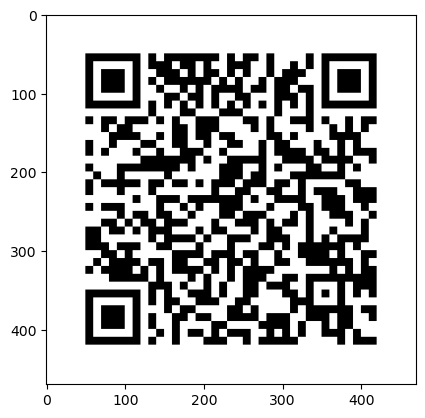

In [9]:
import qrcode
import matplotlib.pyplot as plt

# Define la información que deseas codificar en el código QR
informacion = "https://es.wallapop.com/app/user/gustavos-96333167-evjrvdomkl6k/published"

# Crea el objeto de código QR y genera el código
codigo_qr = qrcode.QRCode(version=1, box_size=10, border=5)
codigo_qr.add_data(informacion)
codigo_qr.make(fit=True)

# Crea una imagen del código QR
imagen_qr = codigo_qr.make_image(fill="black", back_color="white")


plt.imshow(imagen_qr , cmap = 'gray')

# Guarda la imagen en un archivo
imagen_qr.save("C:/Users/jccvm/Downloads/QR Gustavo.png")

In [1]:
import pandas as pd
from scipy.interpolate import CubicSpline
import numpy as np

data = pd.read_csv('./dataset/Datos_TODO_reducido.csv', header=0)

In [4]:
data.index = [x+1995 for x in list(range(26))]

In [5]:
data

,ARG-ARE,AUS-ARE,AUT-ARE,BEL-ARE,BGD-ARE,BRA-ARE,CAN-ARE,CHE-ARE,CHL-ARE,CHN-ARE,...,ROU-ZAF,RUS-ZAF,SAU-ZAF,SDN-ZAF,SGP-ZAF,SWE-ZAF,THA-ZAF,TUR-ZAF,USA-ZAF,VNM-ZAF
1995,16315585.0,1.743842e+08,95413366.0,2.841407e+08,16725541.0,1.090672e+08,1.464124e+08,3.684022e+08,52732322.0,1.100646e+09,...,43421106.0,29359402.0,1.712682e+08,234022.0,3.542732e+08,3.943414e+08,2.016164e+08,6.407607e+07,2.812651e+09,1.231912e+07
1996,37506807.0,2.593809e+08,106172680.0,2.522536e+08,14679560.0,1.716872e+08,1.266539e+08,4.167305e+08,53755853.0,1.076877e+09,...,6714021.0,26096975.0,1.767252e+08,771608.0,3.499688e+08,4.672880e+08,1.837473e+08,6.258043e+07,3.156389e+09,6.897941e+06
1997,46559919.0,3.997052e+08,101253040.0,3.278479e+08,15026808.0,2.505560e+08,1.880118e+08,4.203970e+08,48167232.0,1.301153e+09,...,5617656.0,37537627.0,1.695736e+07,1166582.0,2.765856e+08,4.369760e+08,2.475391e+08,6.927406e+07,3.069027e+09,1.318041e+07
1998,39674787.0,3.471166e+08,122164637.0,4.070703e+08,29167548.0,1.827809e+08,1.955703e+08,4.324040e+08,64748231.0,1.291306e+09,...,3818077.0,22914363.0,3.000953e+07,194638.0,2.916947e+08,4.843680e+08,2.832812e+08,7.166373e+07,3.712333e+09,9.803778e+06
1999,67548591.0,2.499419e+08,130338469.0,4.708355e+08,0.0,1.503316e+08,1.223233e+08,3.937649e+08,26865253.0,1.417092e+09,...,2148316.0,43820097.0,8.232517e+08,382067.0,2.720955e+08,3.361718e+08,2.530941e+08,5.905240e+07,2.819715e+09,1.323445e+07
2000,86267890.0,4.548436e+08,107343128.0,5.758222e+08,27962249.0,2.246353e+08,1.546056e+08,3.974891e+08,34435101.0,2.076091e+09,...,3459839.0,53488807.0,1.568006e+09,243699.0,3.228991e+08,3.418424e+08,3.513944e+08,6.752012e+07,3.087113e+09,2.482579e+07
2001,92541099.0,5.488824e+08,275804296.0,7.713404e+08,38791020.0,4.149675e+08,1.346383e+08,5.784689e+08,32999617.0,2.361334e+09,...,4071508.0,22944594.0,1.281130e+09,138213.0,2.180612e+08,2.717128e+08,3.106650e+08,7.708372e+07,2.962559e+09,2.501950e+07
2002,106125168.0,5.808196e+08,169395363.0,9.044470e+08,12142960.0,6.346111e+08,1.736818e+08,7.336243e+08,106058899.0,3.401727e+09,...,5088056.0,66581811.0,9.999688e+08,279485.0,2.187969e+08,2.813166e+08,3.240241e+08,8.560926e+07,2.523595e+09,1.631993e+07
2003,172035967.0,6.095704e+08,208737556.0,8.865691e+08,12909857.0,5.487893e+08,2.438700e+08,7.418609e+08,51153846.0,4.867229e+09,...,4870802.0,23424963.0,1.958228e+09,860540.0,2.860221e+08,4.455779e+08,3.739491e+08,1.206446e+08,2.818682e+09,2.332657e+07
2004,180515310.0,7.356847e+08,252976718.0,1.184821e+09,19482668.0,7.066882e+08,3.237060e+08,9.915663e+08,57392836.0,6.551583e+09,...,6733392.0,24718760.0,1.979054e+09,1737903.0,4.280380e+08,6.081551e+08,6.592126e+08,1.903319e+08,3.174617e+09,5.315836e+07
